#**Predictive Analysis: Probablity of default**
- This analysis involves a dataset from a lending club in the united states which is a peer to peer lending task.
-The main purpose of this analysis is to help the creditors know prior to giving the loan to a borrower whether they will pay the loan or not incase they are given one by calculating the probaility of default.


##**Installing packages**
- We will install different packages.


1.  **New version of pandas profiling**- to help in giving a html report about the dataset structure



In [4]:
## Installing the new version of pandas profiling V2.9
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Requirement already up-to-date: pandas-profiling[notebook] in /usr/local/lib/python3.6/dist-packages (2.9.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [5]:
## installing the new version of pandas in colab
!pip install pandas==1.1.3

#**Importing libraries**

In [11]:


import pandas as pd ## manipulation of dataframes
import numpy as np

## Imports for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Imports from Scikit learn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder ## helps in encoding categorical variables
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder

import warnings ## Suppress warnings
warnings.filterwarnings('ignore')
import os ## for file system management
import gc ## For memory management

import pandas_profiling
from pandas_profiling import ProfileReport




In [7]:
# pandas version
pd.__version__

'1.1.3'

In [8]:
pandas_profiling.__version__

'2.9.0'

#**Loading dataset**
- The dataset was obtained from kaggle dataset.
- It is collected from a lending club from years 2007- 2014 and the second one from 2016 to 2017. 
- The first one consists of 466,285 examples and 74 features. 
- The second dataset consists of 759,338 examples and 72 features.
- We will merge the two datasets to form one dataset. 
- The main purpose is to predict the probability of default of a loan by a given loan applicant.

In [12]:
# Code to read csv file into Colaboratory from the google drive:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Loading the first dataset from years 2007-2014.

In [13]:
link = 'https://drive.google.com/open?id=1p7iz0MmfUPqE0QKGJ8qbFWNuB3R1-lyx'

In [14]:
fluff, id = link.split('=')

print (id) 

1p7iz0MmfUPqE0QKGJ8qbFWNuB3R1-lyx


In [15]:

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data1= pd.read_csv('Filename.csv')
print(data1.shape)
data1.head()

(466285, 74)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  1077501    1296599       5000  ...     NaN          NaN          NaN
1  1077430    1314167       2500  ...     NaN          NaN          NaN
2  1077175    1313524       2400  ...     NaN          NaN          NaN
3  1076863    1277178      10000  ...     NaN          NaN          NaN
4  1075358    1311748       3000  ...     NaN          NaN          NaN

[5 rows x 74 columns]

### Loading the second dataset from 2016-2017

In [16]:
link = 'https://drive.google.com/open?id=1wPv8Z5SgNdWpGwNFGjTN1zU8e1SXMu9G'

In [17]:
fluff, id = link.split('=')

print (id) 

1wPv8Z5SgNdWpGwNFGjTN1zU8e1SXMu9G


In [18]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data2 = pd.read_csv('Filename.csv')
print(data2.shape)
data2.head()

(759338, 72)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  112435993        NaN       2300  ...     1.0          0.0          2.0
1  112290210        NaN      16000  ...     0.0          6.0          1.0
2  112436985        NaN       6025  ...     1.0          5.0          3.0
3  112439006        NaN      20400  ...     1.0          1.0          1.0
4  112438929        NaN      13000  ...     0.0          0.0          0.0

[5 rows x 72 columns]

### Merging the two datasets.

In [19]:

### Merge data1 and data2
data=pd.concat([data1,data2])
## The shape of the new data
print(data.shape)
## Viewing the first five observations
data.head() 

(1225623, 74)


id  member_id  loan_amnt  ...  inq_fi  total_cu_tl inq_last_12m
0  1077501  1296599.0       5000  ...     NaN          NaN          NaN
1  1077430  1314167.0       2500  ...     NaN          NaN          NaN
2  1077175  1313524.0       2400  ...     NaN          NaN          NaN
3  1076863  1277178.0      10000  ...     NaN          NaN          NaN
4  1075358  1311748.0       3000  ...     NaN          NaN          NaN

[5 rows x 74 columns]

#**Exploratory Data Analysis (EDA)**
- Let's first understand how our data looks like by checking the structure of the dataset.
- Then explore the target and later the predictor variables.



In [ ]:

## Checking the columns in the data

print(list(data3.columns))

##**Checking the structure of the dataset**
- We will use pandas profiling function which gives detailed description of the data as an interactive report and works better compared to the normal describe() function.

In [21]:
## since the data is large we will use the command minimal to reduce on the time of execution
## This gives the description of the data
profile = ProfileReport(data, minimal=True)

In [22]:
## Viewing the summary
profile

##**Summary of the features in the data**
- We have 48 numerical variables, 4 boolean and 20 categorical features.
- The dataset has no duplicates but some features have very high percentage of missing values.
- From our summary we see that remaining outstanding principal amount(out_prncp and out_prncp_inv) and the policy code have a constant value and so they will not be very important in our analysis.
- Some of the features like the employment title has very high cardinality and so we will drop all the features with very high cardinality because it might cause overfitting and redaduncy in our analysis.
- Some of the values have a very high number of missing values and so it will be better if we remove them during data preprocessing.

##**Target variable (loan status)**

In [23]:
## The number of examples under each category in the target variable (loan status)

data['loan_status'].value_counts()

Current                                                789749
Fully Paid                                             315457
Charged Off                                             79672
Late (31-120 days)                                      22254
In Grace Period                                          9780
Late (16-30 days)                                        5094
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                   868
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

## The description of the categories under the target variable. 

In [24]:
pd.set_option('display.max_colwidth', -1) ##allows long text to break for readability purpose

## creating a list of the loan status description
description= [
["current","Loan is up to date on current payments.",789749],
["Fully Paid","Loan has been fully paid off.",315457],
["Charged Off","Loan for which there is no longer a reasonable expectation of further payments.",79672],
["Late (31-120 days)","Loan hasn't been paid in 31 to 120 days (late on the current payment).",22254],
["In Grace Period","The loan is past due but still in the grace period of 15 days.",9780],
["Late (16-30 days)","Loan hasn't been paid in 16 to 30 days (late on the current payment).",5094],
["Does not meet the credit policy. Status:Fully Paid","While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",1988],
["Default","Loan is defaulted on and no payment has been made for more than 121 days.",868],
["Does not meet the credit policy. Status:Charged Off","While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",761]]

## creating a dataframe
loan_status_description = pd.DataFrame(description, columns = ['Type of loan', 'description','count'])

## helps to allign the text in the dataframe on the left
df=loan_status_description.style.set_properties(**{'text-align': 'left'})

## alligning the headers/column names to the left also
df.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])



##**Grouping the categories in the loan status**
- We will group the nine classes under the loan status into two categories (good and bad loans)and store them in a new column called Target_variable.
- The current and fully paid will be under the good loans category and the rest will be under bad loans category.

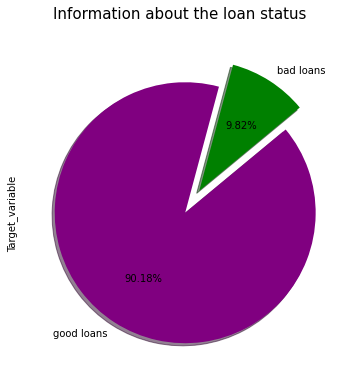

In [25]:
## We group the categories into good and bad loans
defaulted=['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)',
           
           'Does not meet the credit policy. Status:Fully Paid','Default',
           
           'Does not meet the credit policy. Status:Charged Off']

def loan_statuses(status):
  if status in defaulted:
    return 'bad loan'
  else:
    return 'good loan'

## creating a new column target variable
data['Target_variable'] = data['loan_status'].apply(loan_statuses)

## Visualizing the distribution of the bad and good loans in a pie chart

colors = ["purple", "green"]
labels ="good loans", "bad loans"

plt.figure(figsize=(6,6))
plt.suptitle('Information about the loan status', fontsize=15)

data["Target_variable"].value_counts().plot.pie(explode=[0,0.2], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=10, startangle=75)


- We see that the dataset has 9.82% of bad loans and the rest are good loans so we will need to balance the dataset when training the model to avoid overfitting.

##**Multivariate Analysis**

####**$\underline{\text{Loan amount vs funded amount vs amount commited by the investor}}$**
- We first explore the loan applied for by the borrower and the amount that was given by the lender.

Text(0.5, 1.0, 'Total amount committed by investors')

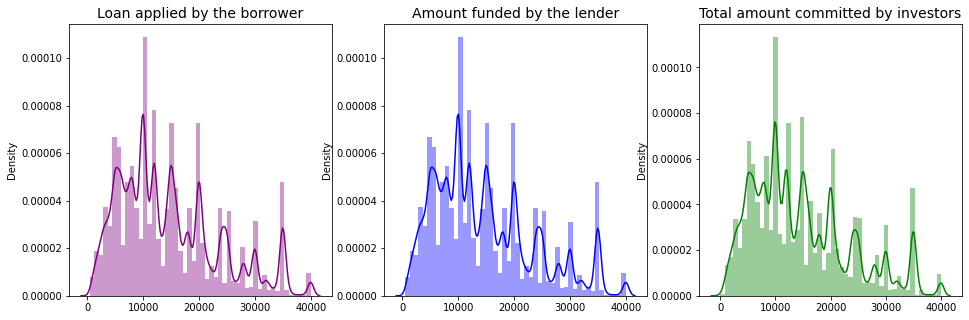

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))
loan_amount = data["loan_amnt"].values
funded_amount = data["funded_amnt"].values
investor_funds = data["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="purple")
ax[0].set_title("Loan applied by the borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="blue")
ax[1].set_title("Amount funded by the lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="green")
ax[2].set_title("Total amount committed by investors", fontsize=14)

####**$\underline{\text{Summary on Loan amount and funded amount}}$**
- We notice that the three graphs have almost the same shape meaning that the amount that the borrower applied for, the amount that was funded and the amount that the investor commited to give was the same.
- We will drop the funded_amnt and funded_amnt_inv columns and remain with the loan_amnt to avoid having redundant features.

##**$\underline{\text{Address state vs Loan Status}}$**
- We now explore how the loans were distributed among regions and see which regions are risky when it comes to loan default.
- Since the column address state has high cardinality we will group the states into five groups: west, south west, south east,south west, mid west and north east.

In [27]:
## Group the states into five groups
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

## Define a function that categorises these states into the five groups
def group_states(states):
  if states in west:
    return 'West'
  elif states in south_west:
    return 'Southwest'
  elif states in south_east:
    return 'Southeast'
  elif states in mid_west:
    return 'Midwest'
  else:
    return 'Northeast'

## Creating a new column States
data['States']=data['addr_state'].apply(group_states)

# We have 120,417 loans categorized as bad loans
badloans_data = data.loc[data["Target_variable"] == "bad loan"]

# loan_status cross
loan_status_cross = pd.crosstab(badloans_data['States'], badloans_data['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_data['States'], badloans_data['loan_status'])

number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 
# number_of_badloans
number_of_loanstatus

loan_status  Charged Off  Default  ...  Late (31-120 days)  Total
States                             ...                           
Midwest      13404        115      ...  3659                20169
Northeast    18336        201      ...  5476                28639
Southeast    19691        199      ...  5484                29711
Southwest    9199         124      ...  2755                14120
West         19042        229      ...  4880                27778

[5 rows x 8 columns]

- We see that those states in the Southeast, Northeast and West have high numbers of bad loans and so are the most risky parts in the United States that lending companies need to be aware of.

###**$\underline{\text{Address state vs income,loan amount,interest rate and dti }}$**

- Let's now check which state the company have competitive advantage in terms of operating activities so we will look at the risk that the company face and the return they get.
- We will use the number of loans offered and the interest rates charged to those states and then try to understand why in those states the company have advantage in terms of operating activities.  
- We will check the dti ratio and the default ratio to assess the relationship between the risk and the return the company gets from the various states.
- dti=$\frac{\text{total debt payment}}{\text{gross income}}$ so the lower the dti the better.

In [28]:
##We want the total loan amount,average interest offered and average annual income earned in each state

loan_amount = data.groupby(['States','addr_state'], as_index=False).loan_amnt.sum()
interest_rate = data.groupby(['States', 'addr_state'], as_index=False).int_rate.mean()
income = data.groupby(['States', 'addr_state'], as_index=False).annual_inc.mean()
Dti=data.groupby(['States', 'addr_state'], as_index=False).dti.mean()#gives a dataframe of the states and region they fall under and the mean of the dti.
loan_status_bystate = pd.crosstab(data['addr_state'], data['Target_variable'])#gives a table showing the frequency of bad and good loans for each state
loan_status_ratio = loan_status_bystate["bad loan"]/(loan_status_bystate["good loan"]+loan_status_bystate["bad loan"])#gives the ratio of bad to good loans for each state

states = loan_amount['addr_state'].values.tolist()#gives a list of the states
total_loan_amounts = loan_amount['loan_amnt'].values.tolist()#gives a list of the values under the column loan amnt
average_interest_rates = interest_rate['int_rate'].values.tolist()
average_annual_income = income['annual_inc'].values.tolist()
average_debt_to_ratio= Dti['dti'].values.tolist()
default_ratio=loan_status_ratio.values.tolist()

print('The average annual income is:',data['annual_inc'].mean())#gives the overall mean of the annual income
print('The average debt ratio is:',data['dti'].mean())
print('The average default ratio is:',loan_status_ratio.mean())

from collections import OrderedDict

##Renaming the column names
operational_data = OrderedDict([('state_codes', states),
                            ('issued_loans', total_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('annual_income', average_annual_income),
                            ('default_ratio', default_ratio),
                            ('Debt_to_Ratio', average_debt_to_ratio)])

pd.set_option("display.max_columns", 10)## Setting a maximum of 10 columns                    
## Creating a dataframe and then sorting using the column issued loan
Operational_data = pd.DataFrame.from_dict(operational_data)
Operational_data = Operational_data.round(decimals=2)
df=Operational_data.sort_values('issued_loans',ascending=False)
print(df.head(n=4))



The average annual income is: 77422.44809388618
The average debt ratio is: 18.310243693624486
The average default ratio is: 0.10256658067259793
   state_codes  issued_loans  interest_rate  annual_income  default_ratio  \
41  CA          2544946825    13.33          82726.04       0.10            
39  TX          1536751900    13.34          82069.90       0.09            
18  NY          1487240350    13.58          80401.33       0.11            
26  FL          1194654075    13.52          72606.55       0.09            

    Debt_to_Ratio  
41  16.86          
39  19.33          
18  16.58          
26  18.46          


###**$\underline{\text{Summary on the risk and returns for each state}}$**
- We notice that the first four states that were given the highest loan were California, Texas, New York and Florida and all of them have interest rates of 13%.
- The first three states California, Texas, New York have average income higher than the overall average annual income (77,422) and this could explain the reason why they are given the highest loan.
- If we check the default ratio of the four states,California, Texas, New York and Florida, we see that it is lower than the average default ratio (12%) and we further see that California and New York also have low dti and so these states are very attractive to invest in since the risk are low and the returns are also attractive to the investors.

###**$\underline{\text{Interest rate vs loan status}}$**
- What is the interest rate charged to those loans that end up been bad loans and those that are good loans.

In [29]:

# Interest rate charged to the loans that end up been good loans
intereston_fully_paid = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Fully Paid'].values), 2)
intereston_current = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Current'].values), 2) 

# Interest rate charged on the loan that end up been bad loans

intereston_default_rates = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Default'].values), 2)
intereston_charged_off = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Charged Off'].values), 2)
intereston_long_fully_paid = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Does not meet the credit policy. Status:Fully Paid'].values), 2)
intereston_long_charged_off = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Does not meet the credit policy. Status:Charged Off'].values), 2)
intereston_grace_period = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'In Grace Period'].values), 2)
intereston_short_late = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Late (16-30 days)'].values), 2)
intereston_long_late = round(np.mean(data['int_rate'].loc[data['loan_status'] == 'Late (31-120 days)'].values), 2)

##Creating a dataframe
df=[intereston_fully_paid,intereston_current,intereston_long_fully_paid,intereston_charged_off,intereston_default_rates,intereston_long_charged_off,
    intereston_grace_period,intereston_short_late,intereston_long_late]
df2=['fully_paid','current','does not meet credit policy:fully paid','charged_off','default','does not meet credit policy:charged off',
'grace_period','Late (16-30 days)','Late (31-120 days)']

Df=pd.DataFrame(df,df2)
Df.columns=['interest_rate(%)']
Df


interest_rate(%)
fully_paid                               13.22           
current                                  13.12           
does not meet credit policy:fully paid   13.98           
charged_off                              16.14           
default                                  16.11           
does not meet credit policy:charged off  14.60           
grace_period                             15.61           
Late (16-30 days)                        15.81           
Late (31-120 days)                       16.12

###$\underline{\text{Summary on the loan status and the interest rate}}$
- The loans that are good loans have an interest rate of 13% and the bad loans are mostly charged an interest rate of 14%-16% except for the loan that does not meet the credit policy at the moment and so it will be a bad loan if it was to be given right now even though it was paid in full back then.

####**$\underline{\text{Purpose of the loan vs default ratio }}$**
- Among the purpose that the applicant applies the loan for, which one has the highest default ratio. 

In [30]:
loan_purpose = data.groupby(['purpose'],as_index=False).sum()## 
loan_status_bypurpose = pd.crosstab(data['purpose'], data['Target_variable'])#gives a table showing the frequency of bad and good loans for the purpose of the loan
total_loanby_purpose = loan_status_bypurpose["bad loan"]+loan_status_bypurpose["good loan"] ## Gives the total loan given under each purpose
loan_status_ration = loan_status_bypurpose["bad loan"]/(loan_status_bypurpose["good loan"]+loan_status_bypurpose["bad loan"])#gives the ratio of bad to good loans for the purpose

purpose = loan_purpose['purpose'].values.tolist()#gives a list of the purpose of the loan
total_loan=total_loanby_purpose.values.tolist()# a list of the total under each loan purpose
default_ration=loan_status_ration.values.tolist()# The default ratio for the different purpose of the loan

##Gives a continous list of the three categories
purpose_data = OrderedDict([('purpose', purpose),('Total_loan',total_loan),
                            ('default_ratio', default_ration)])
                  
## Creating a dataframe and then sorting using the column issued loan
Purpose_data = pd.DataFrame.from_dict(purpose_data)
Purpose_data = Purpose_data.round(decimals=2)
Purpose_data


purpose  Total_loan  default_ratio
0   car                 14174       0.08         
1   credit_card         261925      0.08         
2   debt_consolidation  705725      0.10         
3   educational         422         0.36         
4   home_improvement    83734       0.09         
5   house               5830        0.13         
6   major_purchase      28147       0.09         
7   medical             14962       0.11         
8   moving              8967        0.13         
9   other               74370       0.11         
10  renewable_energy    870         0.14         
11  small_business      15248       0.18         
12  vacation            8903        0.09         
13  wedding             2346        0.14

###$\underline{\text{Summary on the purpose of the loan and the default ratio}}$
- We see that those loans applied for the educational and small business purposes have high percentage of default of 36% and 18% respectively. 
- Most of the loans were applied for the purpose of debt consolidation and credit card and they both had low default rate compared to educational loans that were few and yet had the highest rate of default.

####**$\underline{\text{Grade vs loan amount vs interest rate vs default ratio }}$**
- Check how the interest rates and default rate differ across the grades.
- Also check how the loan amount is funded across the grades.

In [31]:
##We want the total loan amount,average interest offered and average annual income earned in each state

loan_amount = data.groupby(['grade'], as_index=False).loan_amnt.sum()
interest_rate = data.groupby(['grade'], as_index=False).int_rate.mean()
loan_status_bystate = pd.crosstab(data['grade'], data['Target_variable'])#gives a table showing the frequency of bad and good loans for the grade
loan_status_ratio = loan_status_bystate["bad loan"]/(loan_status_bystate["good loan"]+loan_status_bystate["bad loan"])#gives the ratio of bad to good loans for each grade

grades = loan_amount['grade'].values.tolist()#gives a list of the grade
total_loan_amounts = loan_amount['loan_amnt'].values.tolist()#gives a list of the values under the column loan amnt
average_interest_rates = interest_rate['int_rate'].values.tolist()
Default_Ratio=loan_status_ratio.values.tolist()

from collections import OrderedDict

##Renaming the column names
creditscore_data = OrderedDict([('Grade', grades),
                            ('issued_loans', total_loan_amounts),
                            ('interest_rate', average_interest_rates),
                            ('Default_Ratio', Default_Ratio)])

pd.set_option("display.max_columns", 10)## Setting a maximum of 10 columns                    
## Creating a dataframe and then sorting using the column issued loan
Creditscore_data = pd.DataFrame.from_dict(creditscore_data)
Creditscore_data =Creditscore_data.round(decimals=2)
Creditscore_data

Grade  issued_loans  interest_rate  Default_Ratio
0  A     2748992475    7.16           0.03         
1  B     4883708875    10.80          0.07         
2  C     5440832675    14.22          0.10         
3  D     2721481825    18.04          0.16         
4  E     1351943200    21.98          0.21         
5  F     517139100     25.46          0.27         
6  G     180006275     28.03          0.28

####**$\underline{\text{Summary of the grade vs loan amount vs interest rate vs default ratio }}$**
- As we would expect the interest rate increases and so does the default ratio.
- Most loans are offered to the people in grade C.

####**$\underline{\text{Home ownership vs default ratio }}$**

In [32]:
home_ownership = data.groupby(['home_ownership'],as_index=False).sum()## 
loan_status_byhome = pd.crosstab(data['home_ownership'], data['Target_variable'])#gives a table showing the frequency of bad and good loans under each category of home ownership
total_loanby_home = loan_status_byhome["bad loan"]+loan_status_byhome["good loan"] ## Gives the total loan given under each type of home ownership
loan_status_Ratio = loan_status_byhome["bad loan"]/total_loanby_home

homeownership = home_ownership['home_ownership'].values.tolist()#gives a list of the categories of the home ownership type of the loan applicants
total_loan=total_loanby_home.values.tolist()# a list of the total loan under each home ownership category
Default_ratio=loan_status_Ratio.values.tolist()# The default ratio for the different categories under the home ownership of the loan applicant

##Gives a continous list of the three categories
home_data = OrderedDict([('Home_ownership', homeownership),('Total_loan',total_loan),
                            ('default_ratio', Default_ratio)])
                  
## Creating a dataframe and then sorting using the column issued loan
home_ownership_data = pd.DataFrame.from_dict(home_data)
home_ownership_data = home_ownership_data.round(decimals=2)
home_ownership_data

Home_ownership  Total_loan  default_ratio
0  ANY            505         0.06         
1  MORTGAGE       607454      0.09         
2  NONE           54          0.22         
3  OTHER          182         0.36         
4  OWN            131855      0.10         
5  RENT           485573      0.11

- Most loans were applied by applicants who were paying for mortgage and rent.

#**Preprocessing**
- Check all the columns that have missing and remove all those with 50% missing values.
- Remove all the redundant columns that are not available during loan application.
- Perform label encoding to all the columns that are categorical.
- Deal with the missings by replacing them with the mean of the column.
- Perform one hot encoding on the coded columns.
- Perform standardization.

In [33]:
## Dropping all the columns that have 70% missing values
data.dropna(thresh = data.shape[0]*0.7, how = 'all', axis = 'columns', inplace = True)
print(data.shape)

(1225623, 52)


In [34]:
### Checking the 52 columns remaining 
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'Target_variable', 'States'],
      dtype='object')

We are going to remove all those features that are available once one has been given the loan and so they are not important during loan application.

In [35]:
#drop all unnecessary columns/redundant columns

data.drop(columns = ['id', 'funded_amnt', 'funded_amnt_inv','sub_grade', 'emp_title', 'emp_length',
                     'loan_status', 'pymnt_plan','title', 'zip_code','addr_state','delinq_2yrs', 
                     'earliest_cr_line','inq_last_6mths','pub_rec', 'revol_bal', 'revol_util',
                     'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
                     'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                     'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
                    'collections_12_mths_ex_med', 'policy_code','application_type', 'acc_now_delinq',
                     'tot_coll_amt', 'total_rev_hi_lim' 
                     ], inplace = True)

print(data.shape)

(1225623, 17)


In [36]:

## Checking whether we still have missing values
data.isna().sum()

loan_amnt              0    
term                   0    
int_rate               0    
installment            0    
grade                  0    
home_ownership         0    
annual_inc             4    
verification_status    0    
issue_d                0    
purpose                0    
dti                    355  
open_acc               29   
total_acc              29   
initial_list_status    0    
tot_cur_bal            70276
Target_variable        0    
States                 0    
dtype: int64

In [37]:
## Identifying all the categorical features in the data
categorical_list=data.select_dtypes(include="object").columns
print(categorical_list)

Index(['term', 'grade', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'initial_list_status', 'Target_variable', 'States'],
      dtype='object')


- We will first do label encoding on the target variable (loan status) and label it as the target and then drop it from the main data to avoid it from been standardized.

In [38]:
## Performing label encoding on the target variable and renaming the column from loan_status to target_variable
data['Loan_status']= (data['Target_variable'] == 'bad loan').apply(np.uint8)
data.drop('Target_variable', axis=1, inplace=True)
data

loan_amnt        term  int_rate  installment grade  ... total_acc  \
0       5000        36 months  10.65     162.87       B     ...  9.0        
1       2500        60 months  15.27     59.83        C     ...  4.0        
2       2400        36 months  15.96     84.33        C     ...  10.0       
3       10000       36 months  13.49     339.31       C     ...  37.0       
4       3000        60 months  12.69     67.79        B     ...  38.0       
...      ...              ...    ...       ...       ..     ...   ...       
759333  6000       36 months   7.89      187.72       A     ...  14.0       
759334  6000       36 months   9.17      191.28       B     ...  17.0       
759335  14400      60 months   13.18     328.98       C     ...  19.0       
759336  34050      36 months   15.41     1187.21      D     ...  21.0       
759337  5000       36 months   11.22     164.22       B     ...  8.0        

        initial_list_status tot_cur_bal     States Loan_status  
0       f                   NaN          Southwest  0           
1       f                   NaN          Southeast  1           
2       f                   NaN          Midwest    0           
3       f                   NaN          West       0           
4       f                   NaN          West       0           
...    ..                    ..           ...      ..           
759333  w                    9223.0      Midwest    0           
759334  w                    30895.0     Midwest    0           
759335  w                    35979.0     Midwest    1           
759336  w                    104560.0    Northeast  0           
759337  w                    206884.0    Southeast  0           

[1225623 rows x 17 columns]

In [39]:
## Creating a dataframe of the target variable 
Targ=pd.concat([data['issue_d'],data['Loan_status']],axis=1)
Targ

issue_d  Loan_status
0       Dec-11  0          
1       Dec-11  1          
2       Dec-11  0          
3       Dec-11  0          
4       Dec-11  0          
...        ... ..          
759333  Jan-16  0          
759334  Jan-16  0          
759335  Jan-16  1          
759336  Jan-16  0          
759337  Jan-16  0          

[1225623 rows x 2 columns]

In [40]:
##The columns we are using
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'open_acc', 'total_acc', 'initial_list_status',
       'tot_cur_bal', 'States', 'Loan_status'],
      dtype='object')

In [41]:
## All the features in the dataset that are numerical
features=['loan_amnt',  'int_rate', 'installment',
        'annual_inc', 
        'dti','open_acc', 'tot_cur_bal', 'total_acc']
    
numerical_features=pd.DataFrame(data[features])
numerical_features.head()

loan_amnt  int_rate  installment  annual_inc    dti  open_acc  tot_cur_bal  \
0  5000       10.65     162.87       24000.0     27.65  3.0      NaN            
1  2500       15.27     59.83        30000.0     1.00   3.0      NaN            
2  2400       15.96     84.33        12252.0     8.72   2.0      NaN            
3  10000      13.49     339.31       49200.0     20.00  10.0     NaN            
4  3000       12.69     67.79        80000.0     17.94  15.0     NaN            

   total_acc  
0  9.0        
1  4.0        
2  10.0       
3  37.0       
4  38.0

In [42]:
## Filling all the missing values in the numerical features with the mean
numerical_features.fillna(numerical_features.mean(),inplace = True)
print("Current shape of dataset :",numerical_features.shape)

Current shape of dataset : (1225623, 8)


In [43]:
numerical_features.isnull().sum().values.any() ## checking whether there is any missing

False

In [44]:
## Standardizing the loan amount column 
numerical_features['loanAmt'] = StandardScaler().fit_transform(np.array(numerical_features['loan_amnt']).reshape(-1, 1)) 
  
# drop the loan amount column as they are not relevant for prediction purpose  
numerical_features = numerical_features.drop(['loan_amnt'], axis = 1)
numerical_features


int_rate  installment  annual_inc    dti  open_acc    tot_cur_bal  \
0       10.65     162.87       24000.0     27.65  3.0       142692.416964   
1       15.27     59.83        30000.0     1.00   3.0       142692.416964   
2       15.96     84.33        12252.0     8.72   2.0       142692.416964   
3       13.49     339.31       49200.0     20.00  10.0      142692.416964   
4       12.69     67.79        80000.0     17.94  15.0      142692.416964   
...       ...       ...            ...       ...   ...                ...   
759333  7.89      187.72       38000.0     12.35  10.0      9223.000000     
759334  9.17      191.28       32640.0     22.76  9.0       30895.000000    
759335  13.18     328.98       47000.0     19.64  7.0       35979.000000    
759336  15.41     1187.21      87800.0     12.10  14.0      104560.000000   
759337  11.22     164.22       65000.0     3.10   6.0       206884.000000   

        total_acc   loanAmt  
0       9.0       -1.077030  
1       4.0       -1.358704  
2       10.0      -1.369971  
3       37.0      -0.513683  
4       38.0      -1.302369  
...      ...            ...  
759333  14.0      -0.964361  
759334  17.0      -0.964361  
759335  19.0      -0.017938  
759336  21.0       2.196015  
759337  8.0       -1.077030  

[1225623 rows x 8 columns]

##**Standardization**
- We will standardize the numerical variables.

In [45]:
## Standardizing the amount column 
numerical_features['interest'] = StandardScaler().fit_transform(np.array(numerical_features['int_rate']).reshape(-1, 1)) 
numerical_features['installments'] = StandardScaler().fit_transform(np.array(numerical_features['installment']).reshape(-1, 1))
numerical_features['income'] = StandardScaler().fit_transform(np.array(numerical_features['annual_inc']).reshape(-1, 1))
numerical_features['dti_ratio'] = StandardScaler().fit_transform(np.array(numerical_features['dti']).reshape(-1, 1))
numerical_features['open_accts'] = StandardScaler().fit_transform(np.array(numerical_features['open_acc']).reshape(-1, 1))
numerical_features['Total_balance'] = StandardScaler().fit_transform(np.array(numerical_features['tot_cur_bal']).reshape(-1, 1))
numerical_features['Total_acc'] = StandardScaler().fit_transform(np.array(numerical_features['total_acc']).reshape(-1, 1))

# drop Time and Amount columns as they are not relevant for prediction purpose  
droped=['int_rate', 'installment',
        'annual_inc', 'total_acc',
        'dti','open_acc', 'tot_cur_bal' ]
numerical_features = numerical_features.drop(droped,axis = 1)
                                             
numerical_features

loanAmt  interest  installments    income  dti_ratio  open_accts  \
0      -1.077030 -0.578091 -1.044428     -0.401497  0.804522  -1.561484     
1      -1.358704  0.382151 -1.434756     -0.356404 -1.491096  -1.561484     
2      -1.369971  0.525564 -1.341947     -0.489789 -0.826099  -1.743460     
3      -0.513683  0.012188 -0.376051     -0.212106  0.145555  -0.287652     
4      -1.302369 -0.154088 -1.404603      0.019372 -0.031893   0.622228     
...          ...       ...       ...           ...       ...        ...     
759333 -0.964361 -1.151743 -0.950293     -0.296280 -0.513413  -0.287652     
759334 -0.964361 -0.885702 -0.936807     -0.336563  0.383300  -0.469628     
759335 -0.017938 -0.052244 -0.415182     -0.228640  0.114545  -0.833580     
759336  2.196015  0.411249  2.835901      0.077993 -0.534947   0.440252     
759337 -1.077030 -0.459620 -1.039314     -0.093361 -1.310203  -1.015556     

        Total_balance  Total_acc  
0      -1.885190e-16  -1.309346   
1      -1.885190e-16  -1.731997   
2      -1.885190e-16  -1.224816   
3      -1.885190e-16   1.057497   
4      -1.885190e-16   1.142027   
...              ...        ...   
759333 -8.645432e-01  -0.886696   
759334 -7.241636e-01  -0.633106   
759335 -6.912322e-01  -0.464045   
759336 -2.470013e-01  -0.294985   
759337  4.157986e-01  -1.393877   

[1225623 rows x 8 columns]

##**One hot encoding** 
- We are going to first create a new dataframe that consists of the catagorical variables and then perform one hot encoding on the categorical variables by creating dummy variables using pandas.

In [46]:
Data=pd.concat([data['term'], data['purpose'],data['grade'],data['home_ownership'],
              
              data['verification_status'],data['States'],data['initial_list_status']],axis=1)

Data

term             purpose grade home_ownership  \
0        36 months  credit_card         B     RENT            
1        60 months  car                 C     RENT            
2        36 months  small_business      C     RENT            
3        36 months  other               C     RENT            
4        60 months  other               B     RENT            
...            ...    ...              ..      ...            
759333  36 months   credit_card         A     OWN             
759334  36 months   debt_consolidation  B     RENT            
759335  60 months   credit_card         C     RENT            
759336  36 months   credit_card         D     MORTGAGE        
759337  36 months   home_improvement    B     MORTGAGE        

       verification_status     States initial_list_status  
0       Verified            Southwest  f                   
1       Source Verified     Southeast  f                   
2       Not Verified        Midwest    f                   
3       Source Verified     West       f                   
4       Source Verified     West       f                   
...                 ...      ...      ..                   
759333  Source Verified     Midwest    w                   
759334  Not Verified        Midwest    w                   
759335  Verified            Midwest    w                   
759336  Source Verified     Northeast  w                   
759337  Source Verified     Southeast  w                   

[1225623 rows x 7 columns]

In [47]:
## Making sure that the string term has only two options by removing the space between the quotesi.e "36 months"="36 months "
Data['term'] = Data['term'].str.replace(" ","")


In [48]:
## One hot encoding using pandas 
Daata=pd.get_dummies(Data)
Daata

term_36months  term_60months  purpose_car  purpose_credit_card  \
0       1              0              0            1                     
1       0              1              1            0                     
2       1              0              0            0                     
3       1              0              0            0                     
4       0              1              0            0                     
...    ..             ..             ..           ..                     
759333  1              0              0            1                     
759334  1              0              0            0                     
759335  0              1              0            1                     
759336  1              0              0            1                     
759337  1              0              0            0                     

        purpose_debt_consolidation  ...  States_Southeast  States_Southwest  \
0       0                           ...  0                 1                  
1       0                           ...  1                 0                  
2       0                           ...  0                 0                  
3       0                           ...  0                 0                  
4       0                           ...  0                 0                  
...    ..                           ... ..                ..                  
759333  0                           ...  0                 0                  
759334  1                           ...  0                 0                  
759335  0                           ...  0                 0                  
759336  0                           ...  0                 0                  
759337  0                           ...  1                 0                  

        States_West  initial_list_status_f  initial_list_status_w  
0       0            1                      0                      
1       0            1                      0                      
2       0            1                      0                      
3       1            1                      0                      
4       1            1                      0                      
...    ..           ..                     ..                      
759333  0            0                      1                      
759334  0            0                      1                      
759335  0            0                      1                      
759336  0            0                      1                      
759337  0            0                      1                      

[1225623 rows x 39 columns]

## Merging the newly formed dummy variables and the standardized numerical variables.

In [50]:
loan_data=pd.concat([numerical_features,Daata],axis=1)
loan_data

loanAmt  interest  installments    income  dti_ratio  ...  \
0      -1.077030 -0.578091 -1.044428     -0.401497  0.804522   ...   
1      -1.358704  0.382151 -1.434756     -0.356404 -1.491096   ...   
2      -1.369971  0.525564 -1.341947     -0.489789 -0.826099   ...   
3      -0.513683  0.012188 -0.376051     -0.212106  0.145555   ...   
4      -1.302369 -0.154088 -1.404603      0.019372 -0.031893   ...   
...          ...       ...       ...           ...       ...   ...   
759333 -0.964361 -1.151743 -0.950293     -0.296280 -0.513413   ...   
759334 -0.964361 -0.885702 -0.936807     -0.336563  0.383300   ...   
759335 -0.017938 -0.052244 -0.415182     -0.228640  0.114545   ...   
759336  2.196015  0.411249  2.835901      0.077993 -0.534947   ...   
759337 -1.077030 -0.459620 -1.039314     -0.093361 -1.310203   ...   

        States_Southeast  States_Southwest  States_West  \
0       0                 1                 0             
1       1                 0                 0             
2       0                 0                 0             
3       0                 0                 1             
4       0                 0                 1             
...    ..                ..                ..             
759333  0                 0                 0             
759334  0                 0                 0             
759335  0                 0                 0             
759336  0                 0                 0             
759337  1                 0                 0             

        initial_list_status_f  initial_list_status_w  
0       1                      0                      
1       1                      0                      
2       1                      0                      
3       1                      0                      
4       1                      0                      
...    ..                     ..                      
759333  0                      1                      
759334  0                      1                      
759335  0                      1                      
759336  0                      1                      
759337  0                      1                      

[1225623 rows x 47 columns]

- The number of columns increased from 17 to 47 due to the dummy variables created after one hot encoding.

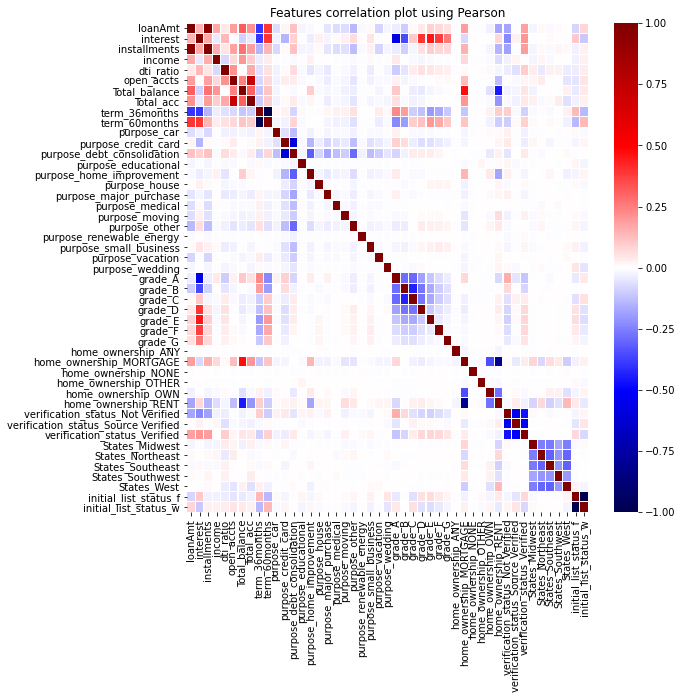

In [51]:
## Correlation matrix to show how the features are correlated as this will affect how the model performs

plt.figure(figsize = (9,9))
plt.title('Features correlation plot using Pearson')
corr = loan_data.corr()## generating the correlation matrix
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="seismic")
plt.show()


In [52]:
### Merging the target variable and the predictor variables
Loan_data=pd.concat([loan_data,Targ],axis=1)
Loan_data

loanAmt  interest  installments    income  dti_ratio  ...  \
0      -1.077030 -0.578091 -1.044428     -0.401497  0.804522   ...   
1      -1.358704  0.382151 -1.434756     -0.356404 -1.491096   ...   
2      -1.369971  0.525564 -1.341947     -0.489789 -0.826099   ...   
3      -0.513683  0.012188 -0.376051     -0.212106  0.145555   ...   
4      -1.302369 -0.154088 -1.404603      0.019372 -0.031893   ...   
...          ...       ...       ...           ...       ...   ...   
759333 -0.964361 -1.151743 -0.950293     -0.296280 -0.513413   ...   
759334 -0.964361 -0.885702 -0.936807     -0.336563  0.383300   ...   
759335 -0.017938 -0.052244 -0.415182     -0.228640  0.114545   ...   
759336  2.196015  0.411249  2.835901      0.077993 -0.534947   ...   
759337 -1.077030 -0.459620 -1.039314     -0.093361 -1.310203   ...   

        States_West  initial_list_status_f  initial_list_status_w  issue_d  \
0       0            1                      0                      Dec-11    
1       0            1                      0                      Dec-11    
2       0            1                      0                      Dec-11    
3       1            1                      0                      Dec-11    
4       1            1                      0                      Dec-11    
...    ..           ..                     ..                         ...    
759333  0            0                      1                      Jan-16    
759334  0            0                      1                      Jan-16    
759335  0            0                      1                      Jan-16    
759336  0            0                      1                      Jan-16    
759337  0            0                      1                      Jan-16    

        Loan_status  
0       0            
1       1            
2       0            
3       0            
4       0            
...    ..            
759333  0            
759334  0            
759335  1            
759336  0            
759337  0            

[1225623 rows x 49 columns]

##**Spliting the dataset into training and testing set.**
- We will use the issue date to split the dataset such that the testing set contains the latest years when the loan was issued but we will drop this column since it is not available during loan application.
- We will first change the issue date into datetime object.
- Then split the training set to be 80% of the data.


In [53]:
### Converting the date to be in the format mm-yyyy from mm-yy
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('07','2007')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('08','2008')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('09','2009')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('10','2010')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('11','2011')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('12','2012')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('13','2013')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('14','2014')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('16','2016')
Loan_data['issue_d'] = Loan_data['issue_d'].str.replace('17','2017')

In [54]:
## We will convert the date such that every month will start by the first day of the month
#from datetime import date
Loan_data['issuedate']=pd.to_datetime(Loan_data['issue_d'])
Loan_data.drop('issue_d', axis=1, inplace=True)

In [55]:
## viewing the first 10 examples
Loan_data['issuedate'].sample(10)

34057    2017-06-01
96237    2017-04-01
298348   2014-10-01
139789   2013-05-01
747713   2016-01-01
180966   2012-12-01
157415   2017-02-01
387147   2017-07-01
178683   2012-12-01
16860    2011-04-01
Name: issuedate, dtype: datetime64[ns]

In [56]:
## we now understand better how the column issue date looks like
Loan_data['issuedate'].describe()

count     1225623            
unique    112                
top       2016-03-01 00:00:00
freq      61992              
first     2007-06-01 00:00:00
last      2017-09-01 00:00:00
Name: issuedate, dtype: object

###**$\underline{\text{Summary about the issue of the loan}}$**
- In the data we see that the month of March on 2016 many loan applicants were issued with a loan than any other year.
- The first loan was issued on June 2006 and the recent one was issued on September 2017.

In [57]:
## Spliting the data into training and testing set
train_data = Loan_data.loc[Loan_data['issuedate'] <  Loan_data['issuedate'].quantile(0.8)]
test_data =  Loan_data.loc[Loan_data['issuedate']>= Loan_data['issuedate'].quantile(0.8)]
print('The shape of the training set is:',train_data.shape)
print('The shape of the testing set is:',test_data.shape)

The shape of the training set is: (960290, 49)
The shape of the testing set is: (265333, 49)


In [58]:
## Describing the column issuedate under the training data set
train_data['issuedate'].describe()

count     960290             
unique    105                
top       2016-03-01 00:00:00
freq      61992              
first     2007-06-01 00:00:00
last      2017-02-01 00:00:00
Name: issuedate, dtype: object

- From above we see that the training set contains data from June 2007 to June 2016.

In [59]:
test_data['issuedate'].describe()

count     265333             
unique    7                  
top       2017-08-01 00:00:00
freq      43573              
first     2017-03-01 00:00:00
last      2017-09-01 00:00:00
Name: issuedate, dtype: object

- We will test the model using data from July 2016 to September 2017. 

In [60]:
## Droping the issuedate column since it is not available during loan application
train_data=train_data.drop('issuedate', axis=1)
test_data=test_data.drop('issuedate', axis=1)



#**Model creation**
- We will first assign the predictor variables and the predicted one.
- We will create a model without performing any resampling technique and see how well the model predicts new data.
- We will then perform resampling on our training set by creating synthetic instances using SMOTE.
- The model is evaluated using precision, recall and F1 score. 

In [61]:
y_train = train_data['Loan_status']
y_test = test_data['Loan_status']

print('The shape of the train set for the predictor is:',y_train.shape)
print('The shape of the train set for the predictor is:',y_test.shape)

The shape of the train set for the predictor is: (960290,)
The shape of the train set for the predictor is: (265333,)


In [62]:
x_train = train_data.drop('Loan_status',axis=1)
x_test = test_data.drop('Loan_status',axis=1)

print('The shape of the train set for the predictor is:',x_train.shape)
print('The shape of the train set for the predictor is:',x_test.shape)

The shape of the train set for the predictor is: (960290, 47)
The shape of the train set for the predictor is: (265333, 47)


##**Logistic Regression**

In [63]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import time
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Evaluation Metric

In [64]:
from sklearn.metrics import accuracy_score

normal_ypred = log_reg.predict(x_test)
print(accuracy_score(y_test, normal_ypred))

0.9664346311992854


###**Probability of default (PD)**

In [65]:
preds_log_reg = log_reg.predict_proba(x_test)
preds_logreg = pd.DataFrame(preds_log_reg[:,1], columns = ['prob_default'])
preds_logreg

prob_default
0       0.102628    
1       0.089246    
2       0.107731    
3       0.085447    
4       0.062333    
...          ...    
265328  0.238300    
265329  0.241439    
265330  0.439615    
265331  0.365076    
265332  0.415898    

[265333 rows x 1 columns]

##**Random Forest with resampling technique(SMOTE)**

In [67]:
## Creating synthetics instances using SMOTE to balance the data
from imblearn.over_sampling import SMOTE
Smt = SMOTE()
x_train_smt, y_train_smt = Smt.fit_resample(x_train, y_train.ravel())

In [68]:
## fitting a model using random forest after performing resampling the data using SMOTE
smt_Rf = RandomForestClassifier().fit(x_train_smt, y_train_smt.ravel())

smt_Rf_pred = smt_Rf.predict(x_test)

In [69]:
### Evaluating the model after resampling the data
normal_ypred = smt_Rf.predict(x_test)
print(accuracy_score(y_test, normal_ypred))

0.9083453622429174


In [70]:
preds = smt_Rf.predict_proba(x_test)
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])
preds_df

prob_default
0       0.35        
1       0.29        
2       0.41        
3       0.52        
4       0.18        
...      ...        
265328  0.34        
265329  0.37        
265330  0.42        
265331  0.37        
265332  0.38        

[265333 rows x 1 columns]

###**Summary on the model.**
- We see that from the two models, Logistic regression performs better than Random forest.